# Pricing-data challenge

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas_profiling

/Users/Xiaonan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:
# set random seed
np.random.seed(1234)

In [ ]:
1) time length of experiment:  ('2015-03-02', '2015-05-31') # 3 month
2) control/ treatment group size ratio: 2:1
3) control group(0, price: 39) has higher conversion rate than treatment group and it is statistically sig.

# Q1: Should the company sell its software for $39 or $59?

Result: first we need to assume/check if the control and treatment samples are representative of real population. 
    Revenue = # of purchase * unit price
If so, since the size of control is 2 times larger than treatment group, we will use 
<font color = 'green'> total revenue/# of all users in each group </font> to compare.
    
   - control: 0.7767 v.s. treatment 0.91684 
   - p-value = 1.5407498604678382e-08
   * we favor treatment group, so the company should sell at $59.

# 0) I need to do data cleaning

In [ ]:
a. Bad time
b. plot Coordinates
c.

# 1 )Load Data

In [10]:
test_result = pd.read_csv('Pricing_Test/test_results.csv')
user = pd.read_csv('Pricing_Test/user_table.csv')

In [8]:
pandas_profiling.ProfileReport(test_result)

Number of variables,8
Number of observations,316800
Total Missing (%),0.0%
Total size in memory,19.3 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,4
Date,0
Text (Unique),0
Rejected,1
Distinct count,2


In [17]:
test_result.describe(include= 'all')

,user_id,timestamp,source,device,operative_system,test,price,converted
count,316800.000000,316800,316800,316800,316800,316800.000000,316800.000000,316800.000000
unique,NaN,140931,12,2,6,NaN,NaN,NaN
top,NaN,2015-04-12 11:51:16,direct_traffic,mobile,windows,NaN,NaN,NaN
freq,NaN,12,60357,186471,100976,NaN,NaN,NaN
mean,499281.341840,NaN,NaN,NaN,NaN,0.360079,46.205051,0.018333
std,288591.154044,NaN,NaN,NaN,NaN,0.480024,9.601487,0.134154
min,3.000000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000
25%,249525.750000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000
50%,499021.500000,NaN,NaN,NaN,NaN,0.000000,39.000000,0.000000
75%,749025.500000,NaN,NaN,NaN,NaN,1.000000,59.000000,0.000000


In [11]:
test_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [12]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [3]:
test_result.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0


In [4]:
user.head(3)

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39


In [63]:
# inner join so there are no null
data = pd.merge(test_result, user, on = 'user_id', how = 'inner')
data.shape

(275616, 12)

In [31]:
test_result.dtypes

user_id              int64
timestamp           object
source              object
device              object
operative_system    object
test                 int64
price                int64
converted            int64
dtype: object

    # no missing value for both tables

In [6]:
test_result.isnull().sum() # no missing value
user.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

    # no duplicated rows for both tables

In [9]:
test_result.duplicated().sum() # 0
user.duplicated().sum() #0

0

In [13]:
# unique user_id in test_result: 316,800
len(np.unique(test_result.user_id)) #316,800

# unique user_id in user: 275,616
len(np.unique(user.user_id)) #275616

275616

# 2) Data Cleaning

first, check if there are mis-labeled samples. And there are some. In control groups, some of them are labeled as \$59 and also in test group, some of them are labeled as \$39 .


In [13]:
test_result.groupby(['test','price'])['user_id'].size()

test  price
0     39       202517
      59          210
1     39          155
      59       113918
dtype: int64

- now remove those mislabeled samples. I could talk with people who created this experiment for clarification, but now I will remove those rows

In [15]:
# use more () to make the logic clear
mislabeled = test_result[((test_result['price'] == 39) & (test_result['test'] ==1))|
                         ((test_result['price'] == 59) & (test_result['test'] ==0))
                         ]
mislabeled.shape

(365, 8)

In [18]:
mislabeled.head(2) # I will use those index to remove them

,user_id,timestamp,source,device,operative_system,test,price,converted
1457,686486,2015-03-28 15:26:19,seo-other,mobile,android,1,39,0
1912,128338,2015-05-15 11:41:49,direct_traffic,mobile,android,1,39,0


In [21]:
mislabeled.index[:3]

Int64Index([1457, 1912, 2337], dtype='int64')

In [19]:
test_result.shape

(316800, 8)

In [22]:
test_result = test_result.drop(mislabeled.index)
test_result.shape

(316435, 8)

<font color ='blue'> feature timestamp </font>
some samples label in minutes are wrong, they are larger than 59. 
- example: 2015-04-24 12:60:46
- there are 3% samples are wrongly labeled timestamp. I will talk with people who created this time. But for now, I will remove those wrong timestamp datasets.


In [26]:
pd.to_datetime(test_result['timestamp'], errors = 'coerce').isnull().sum()

10260

In [25]:
# errors = 'coerce' meaning put wrong time into nan.
test_result[pd.to_datetime(test_result['timestamp'], errors = 'coerce').isnull()]['timestamp'].head(3)

54     2015-04-24 12:60:46
104    2015-04-24 11:60:20
121    2015-03-14 12:60:02
Name: timestamp, dtype: object

In [37]:
test_result.shape

(316435, 8)

In [38]:
test_result['timestamp'] = pd.to_datetime(test_result['timestamp'], errors = 'coerce')
test_result.dropna(inplace= True)

In [39]:
test_result.shape

(306175, 8)

# 3) Data exploration

In [14]:
# divide test_result into control (0) and treatment group(1)
test_control = test_result[test_result.test == 0]
test_treatment = test_result[test_result.test == 1]

print test_control.shape, test_treatment.shape # ratio control/test = 2:1

(202727, 8) (114073, 8)


In [20]:
a = test_result.test.value_counts(normalize= True)
a

0    0.639921
1    0.360079
Name: test, dtype: float64

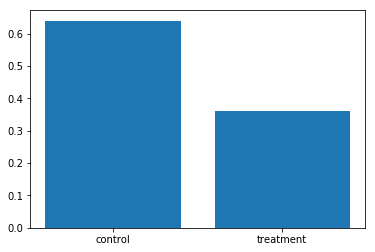

In [21]:
plt.bar([0,1],a)
plt.xticks([0,1],['control','treatment'])
plt.legend()
plt.show()

# insight 1: control group(0, price: 39) has higher conversion rate than treatment group and it is statistically sig.

In [24]:
#  convertion rate in control v.s. treatment
test_result.groupby('test')['converted'].agg(['mean','std'])

,mean,std
test,,
0,0.019904,0.139669
1,0.015543,0.123698


In [39]:
# Now do a T-test to statistically analyze conversion rate control v.s. treatment group
from scipy import stats

In [40]:
t_score, p_value =stats.ttest_ind(test_control['converted'], test_treatment['converted'],
                equal_var= False,nan_policy = 'omit')
t_score, p_value

(9.0860464468946596, 1.0339496325938204e-19)

# Q1: Should the company sell its software for \$39 or $59?

Result: first we need to assume/check if the control and treatment samples are representative of real population. 
    Revenue = # of purchase * unit price
If so, since the size of control is 2 times larger than treatment group, we will use 
<font color = 'green'> total revenue/# of all users in each group </font> to compare.
$\frac{users\ who\ bought\ the\ product\ *\ price}{users\ who\ visited\ the\ site}$.
    
   - control: 0.7767 v.s. treatment 0.91684 
   - p-value = 1.5407498604678382e-08
   * we favor treatment group, so the company should sell at $59.

In [ ]:
# 1) let's calculate the total sales between control and treatment 
# 2) calculate total revunue/all users ($/user) to compare two groups
#  control: 0.7767 v.s. treatment 0.91684 
# 3) unit sale: treament > control

In [28]:
test_result.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0


In [76]:
# divide test_result into control (0) and treatment group(1)
test_control = test_result[test_result.test == 0]
test_treatment = test_result[test_result.test == 1]

print test_control.shape, test_treatment.shape # ratio control/test = 2:1

(195869, 8) (110306, 8)


- create a new column to capture sale amount for each user 
$price *\ converted$

In [78]:
test_result['sale']= test_result['price']*test_result['converted']

In [80]:
from scipy import stats

** Hypothesis test **

* ** $Ho(null\ hypothesis)$ **: 
 - Revenue/user(control) - Revenue/user(treatment) = 0
 - there is no difference of revenue between control and treatment groups.

* $Ha(alternative\ hypothesis)$:
 - Revenue/user(treatment) -Revenue/user(control) > 0
 - there is revenue/user in treatment is larger than the one in control.
 
For this test: 
Standard Error = $ (\frac{sd\_control ^2}{n\_control} + \frac{sd\_test ^2}{n\_test)} )^{0.5}$

diff = mu\_test - mu\_control

In [81]:
t_score2, p_value2 =stats.ttest_ind(test_result[test_result.test == 0]['sale'], 
                                  test_result[test_result.test == 1]['sale'],
                equal_var= False,nan_policy = 'omit')
t_score2, p_value2

(-5.5602090311981325, 2.6983158152863508e-08)

In [74]:
print test_result[test_result.test == 0]['sale'].mean(),
test_result[test_result.test == 1]['sale'].mean()


0.77673422879

0.91684272351914997

# I can also manually calculate this.

In [83]:
# 1) control group
mu_control = test_result[test_result.test == 0]['sale'].mean()
sd_control = test_result[test_result.test == 0]['sale'].std()
n_control = len(test_result[test_result.test == 0]['sale'])

# 2) test_group
mu_test = test_result[test_result.test == 1]['sale'].mean()
sd_test = test_result[test_result.test == 1]['sale'].std()
n_test = len(test_result[test_result.test == 1]['sale'])



In [84]:
print ("control group's mean, sd and size: %.2f , %.2f, %d"
       %(mu_control, sd_control, n_control))

print ("treatment group's mean, sd and size: %.2f , %.2f, %d"
       %(mu_test, sd_test, n_test))

control group's mean, sd and size: 0.78 , 5.45, 195869
treatment group's mean, sd and size: 0.92 , 7.30, 110306


In [88]:
# manual calculation --one-tail(5% confidence level) for SE 1.645

#1) calculate standard error se = sqrt(sd1**2/n1 + sd2**2/n2)
SE = np.sqrt(sd_control**2/n_control + sd_test**2/n_test)
# SE = 0.02518582137479013

# 2) calulate difference 
diff = mu_test - mu_control
# diff = 0.14003843146625106

# 3) calculate 
Z = diff* 1.00/SE
# Z = 5.56 > 1.645 so we reject null hypothesis, favor Ha, alternative hypothesis

5.5602090311981325

# Q2: actionable insights for VP on conversion rate

 Conversion rate = total num of converted people/ total num of people

In [46]:
test_result.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0


In [45]:
# feature exploration
test_result['timestamp'] = pd.to_datetime(test_result['timestamp'],
                               infer_datetime_format = True, 
                               errors = 'coerce') 

In [ ]:
# test time range ('2015-03-02', '2015-05-31') # 3 month

In [48]:
test_result['timestamp'].min(), test_result['timestamp'].max()

(Timestamp('2015-03-02 00:04:12'), Timestamp('2015-05-31 23:59:45'))

# focus on control group first

    a. I'd love to divide into control and treatment groups first, and then see conversion rate in each group to get insights.
#Let's groupby and see each feature towards conversion rate

In [53]:
test_control = test_result[test_result.test == 0]
test_treatment = test_result[test_result.test == 1]

In [49]:
# some exploration on source , device and operative_system

In [ ]:
device: ['mobile', 'web']
source: ['ads-bing', 'ads-google', 'ads-yahoo', 'ads_facebook', 'ads_other',
       'direct_traffic', 'friend_referral', 'seo-bing', 'seo-google',
       'seo-other', 'seo-yahoo', 'seo_facebook']
operative_system:['android', 'iOS', 'linux', 'mac', 'other', 'windows']

In [52]:
np.unique(test_result.device)
np.unique(test_result.source)
np.unique(test_result.operative_system)

array(['android', 'iOS', 'linux', 'mac', 'other', 'windows'], dtype=object)

In [58]:
# baseline: mean conversion rate for control: 0.0199(or 1.99%)
test_control['converted'].mean()*100

1.9903614220108816

In [57]:
# let's groupby one-on-one feature: device, not much difference
test_control.groupby('device')['converted'].mean()*100

device
mobile    1.987865
web       1.994018
Name: converted, dtype: float64

In [60]:
# friend_referral has highest conversion rate: 4.17%
# conversion rate:friend_referral(4.17%) > seo_bing(3.00%)> 
    # ads_facebook(2.37%) > ads_google(2.26%)
# share(% among total visits): friend_referral(6.479%), seo_bing(0.658%),
        # ads_facebook(16.82%), ads_google(18.67%)
# in terms of composition 
a = test_control.groupby('source')['converted'].mean()*100
a.sort_values(ascending= False)

source
friend_referral    4.172059
seo-bing           2.998501
ads_facebook       2.366638
ads-google         2.255441
seo-yahoo          1.948201
seo-google         1.754734
seo-other          1.749024
seo_facebook       1.744488
ads-yahoo          1.681196
ads_other          1.540137
direct_traffic     1.354524
ads-bing           1.334794
Name: converted, dtype: float64

In [40]:
import seaborn as sns

In [61]:
a = test_result.source.value_counts(normalize= True)
x = a.index.tolist()
y = a.values

In [66]:
b = test_result.groupby('source')['converted'].mean()
x2 = b.index.tolist()
y2 = b.values

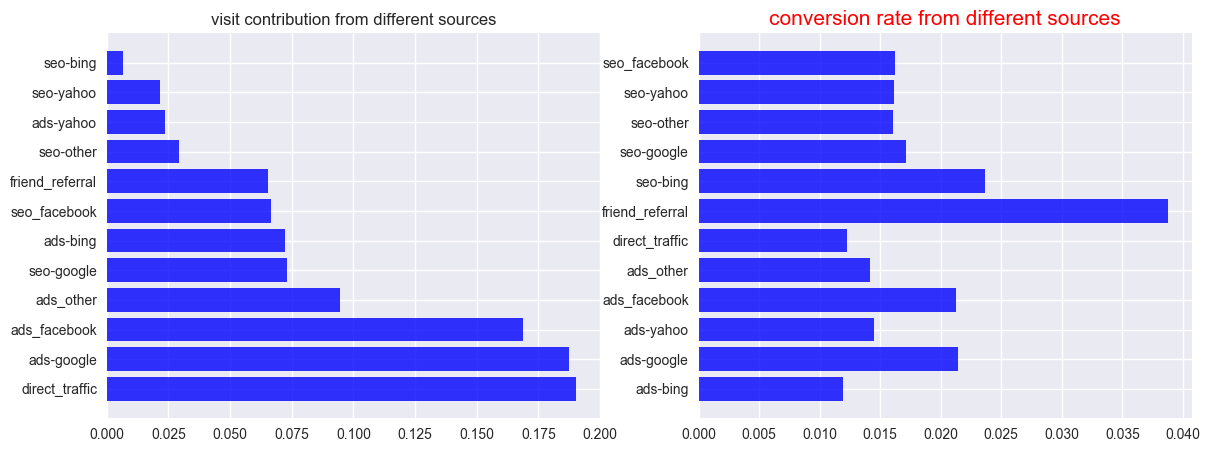

In [70]:
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize= (14,5))
ax[0].barh(range(len(x)), y , alpha = 0.8, color = 'b')
ax[0].set_yticks(range(len(x)))
ax[0].set_yticklabels(x)
ax[0].set_title('visit contribution from different sources')


ax[1].barh(range(len(x2)), y2 , alpha = 0.8, color = 'b')
ax[1].set_yticks(range(len(x2)))
ax[1].set_yticklabels(x2)
ax[1].set_title('conversion rate from different sources', fontsize = 15, color = 'r')

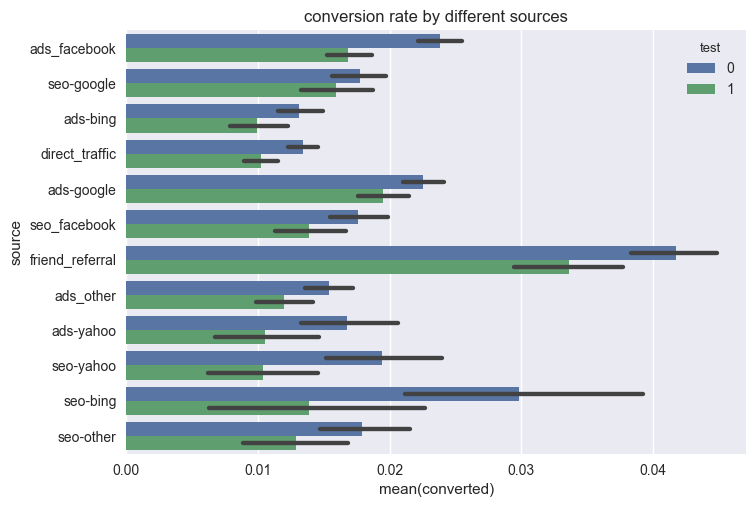

In [43]:
sns.barplot(data = test_result, x = 'converted', y = 'source',
            hue = 'test', orient = 'h')
plt.title('conversion rate by different sources')
plt.show()

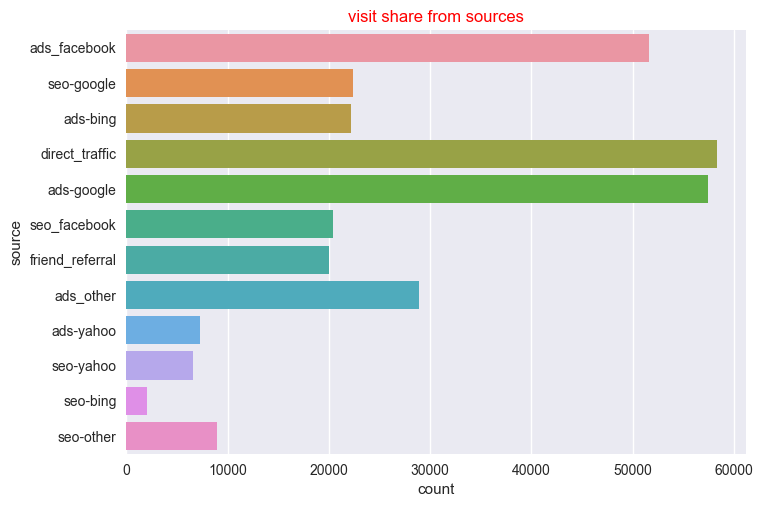

In [75]:
sns.countplot(data = test_result, y = 'source')
plt.title('visit share from sources', color = 'red')
plt.savefig('visit_share.tiff')

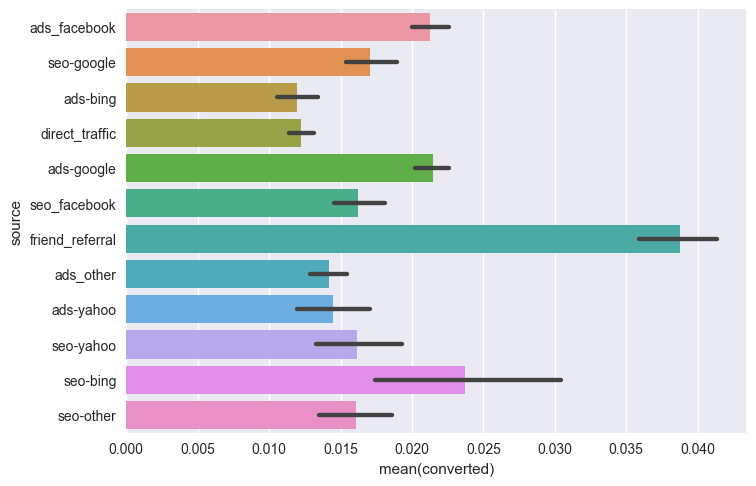

In [72]:
sns.barplot(data= test_result, y ='source', x='converted',)

sns.despine()

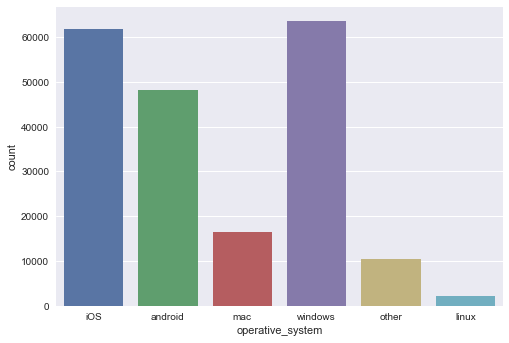

In [178]:
sns.countplot(test_control.operative_system)
sns.despine()

In [180]:
# operative system
# mac(2.547965)> ios(2.358742)
b = test_control.groupby('operative_system')['converted'].agg(['mean','count'])
b.sort_values(['mean','count'],ascending=[0,0])

,mean,count
operative_system,,
mac,0.025480,16366
iOS,0.023587,61855
windows,0.018698,63591
android,0.016366,48210
linux,0.015406,2207
other,0.014003,10498


In [69]:
test_control.source.value_counts(normalize= True)* 100

direct_traffic     19.118815
ads-google         18.677335
ads_facebook       16.820157
ads_other           9.512300
seo-google          7.449427
ads-bing            7.206243
seo_facebook        6.644897
friend_referral     6.479157
seo-other           2.904892
ads-yahoo           2.376595
seo-yahoo           2.152155
seo-bing            0.658028
Name: source, dtype: float64

In [67]:
# see if there are relationship between operation_system and source
pivot = pd.pivot_table(data = test_control,
    index = 'source', 
    columns= 'operative_system', values = 'converted',aggfunc= 'count')
pivot

operative_system,android,iOS,linux,mac,other,windows
source,,,,,,
ads-bing,3460,4507,152,1124,778,4588
ads-google,8792,11736,460,3028,1892,11956
ads-yahoo,1104,1549,62,353,245,1505
ads_facebook,8040,10575,328,2724,1861,10571
ads_other,4478,5723,245,1537,1040,6261
direct_traffic,9401,11823,375,3127,2035,11998
friend_referral,3165,4092,138,1139,545,4056
seo-bing,306,468,5,103,56,396
seo-google,3693,4527,160,1269,875,4578


In [77]:
test_control.groupby(['source','operative_system'])['converted'].mean().unstack('source')*100

source,ads-bing,ads-google,ads-yahoo,ads_facebook,ads_other,direct_traffic,friend_referral,seo-bing,seo-google,seo-other,seo-yahoo,seo_facebook
operative_system,,,,,,,,,,,,
android,1.300578,1.933576,1.268116,2.027363,1.049576,0.936071,4.107425,2.614379,1.489304,1.435750,0.815217,1.221747
iOS,1.530952,2.598841,1.678502,2.789598,1.904595,1.674702,4.521017,2.777778,1.943892,2.867174,2.768987,2.241113
linux,0.000000,1.521739,0.000000,1.524390,2.448980,1.066667,5.072464,0.000000,1.875000,1.515152,1.754386,0.000000
mac,1.156584,2.774108,3.116147,3.267254,2.016916,2.046690,3.863038,4.854369,2.600473,1.609658,1.608579,2.655678
other,0.899743,2.114165,0.816327,1.450833,1.153846,0.786241,3.119266,1.785714,1.714286,0.772201,0.555556,0.956284
windows,1.329555,2.074272,1.860465,2.156844,1.469414,1.291882,4.068047,3.282828,1.550896,1.170483,2.382671,1.662050


In [79]:
test_control.operative_system.value_counts(normalize= True)*100

windows    31.367800
iOS        30.511476
android    23.780749
mac         8.072926
other       5.178393
linux       1.088656
Name: operative_system, dtype: float64

# Insight 2

Insight 2: 
    1) for source itself, friend_referral gives highest conversion rate,
        # conversion rate:friend_referral(4.17%) > seo_bing(3.00%)> ads_facebook(2.37%) > ads_google(2.26%)
        # share(% among total visits): friend_referral(6.479%), seo_bing(0.658%),ads_facebook(16.82%), ads_google(18.67%)
    2) for operation system alone, mac(2.547965)> ios(2.358742) gave the two high conversion rate.
    # share  mac(8.07%), ios(30.51%)

* ** tips1 : friend_referral is most effective way to get conversion(4.2% conversion rate, general average 1.9%). **
    * Now it only consists of 6.5% traffic of source, <font color='green'>we should promote this friend_referral: for example, give some reward system to encourage friend referral. </font>


* ** tip2:  operation system from mac and ios has higher conversion rate(mac: 2.55%, ios: 2.36%) and their traffic share are(mac(8.07%), ios(30.51%)). **
     * so IOS is an important operation system, considering its conversion rate and traffic share. Therefore, so we need to make sure our site is alway compatible with IOS system. Engineer site need to put this as a top priority
     * android system plays bad. 
     Android: (1.63% conversion rate and 23.78% traffic source). 
     Windows: (1.87% conversion rate and 31.36% traffic source).
     ** <font color='green'> so we should send survey to android users for improvement feedbacks and then consider hire a front-end engineer to make a better android system for our site. </font>**


* ** tip3: in terms of source from ads, ads_facebook and ads_google have higher conversion rate:  ads_facebook(2.37%) > ads_google(2.26%) and their corresponding traffic share are ads_facebook(16.82%), ads_google(18.67%) **
     * so we should focus or spend more money on those two ads(ads_facebook and ads_google) rather than other ads_.
     * for seo search, seo_bing turns out to have highest conversion rate(3.00%), but it only contributes to 0.66% traffic. We could discuss with engineer/marketing to promote our site on bing-search.


In [80]:
# merge two datasets- 
# data = pd.merge(test_result, user, on = 'user_id', how = 'inner')
data.shape

(275616, 12)

In [81]:
data.head(2)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24


In [98]:
data_control = data[data.test == 0]
data_test = data[data.test == 1]


In [134]:
data_control.shape[0], data_test.shape[0]

(176428, 99188)

In [91]:
# top 10 most used cities
data.city.value_counts(normalize = True)[:10]*100

New York        9.341983
Chicago         2.595277
Houston         2.433095
San Antonio     1.680962
Los Angeles     1.502453
San Jose        1.216910
Indianapolis    1.167204
Jacksonville    1.054003
Philadelphia    0.921935
Las Vegas       0.880210
Name: city, dtype: float64

In [129]:
# this is the list of top 10 most-used cities
city_top10 = data.city.value_counts(normalize = True).index[:10]
city_top10 = pd.Series(city_top10)

city_share = pd.Series(data.city.value_counts(normalize = True).values[:10]*100)
conversion_top10 = []
for city in city_top10:
    conversion_top10.append(data_control[data_control.city == city]['converted'].mean()*100)
conversion_top10 = pd.Series(conversion_top10) 

In [130]:
city_share

0    9.341983
1    2.595277
2    2.433095
3    1.680962
4    1.502453
5    1.216910
6    1.167204
7    1.054003
8    0.921935
9    0.880210
dtype: float64

In [116]:
rank = pd.Series(range(1,11))

In [132]:
city_top10_df = pd.concat([city_top10,conversion_top10, rank, city_share],axis = 1,
                          ignore_index= True)
city_top10_df.columns = ['city','conversion_rate','rank','city_share']
city_top10_df.sort_values(by = 'conversion_rate', ascending= 0)

,city,conversion_rate,rank,city_share
8,Philadelphia,2.123786,9,0.921935
4,Los Angeles,2.122016,5,1.502453
3,San Antonio,2.008169,4,1.680962
2,Houston,1.946073,3,2.433095
0,New York,1.852522,1,9.341983
9,Las Vegas,1.651255,10,0.880210
7,Jacksonville,1.637612,8,1.054003
5,San Jose,1.608325,6,1.216910
6,Indianapolis,1.470588,7,1.167204
1,Chicago,1.436657,2,2.595277


# Insight 3

* Geographic exploration:
    * 1) this data is US only( 923 cities)
    * 2) Major cities are New York(9.34%), Chicago(2.59%),Houston(2.43%),San Antonio(1.7%), which contribute to 13.63% of total traffic.


However these three major cities' conversion rates are all below average 1.99%. 
   1. New York (1.85%), Chicago (1.43%), Houston (1.95%). These should be our main focus to increase conversion rate.
   2. <font color = 'red'>We should talk with regional managers and improve those three cities as a priority. For example, we could learn useful tips from other cities and apply to these three top cities.</font>
   

In [ ]:
# use NY as an example: android system doesn't play well 

In [138]:
NY = data[data.city == 'New York']
NY.groupby(['device'])['converted'].mean()

device
mobile    0.017484
web       0.016817
Name: converted, dtype: float64

In [157]:
NY.source.value_counts(normalize= True)

direct_traffic     0.195005
ads-google         0.185490
ads_facebook       0.165450
ads_other          0.095464
seo-google         0.070607
ads-bing           0.069753
seo_facebook       0.069326
friend_referral    0.065947
seo-other          0.029633
ads-yahoo          0.025050
seo-yahoo          0.019885
seo-bing           0.008389
Name: source, dtype: float64

In [152]:
NY_sub = NY[NY.source.isin(['direct_traffic','ads-google','ads_facebook',
                          'friend_referral','seo-bing'])]
NY_sub[:2]

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94
18,747762,2015-04-04 23:10:20,ads_facebook,mobile,iOS,0,39,0,New York,USA,40.67,-73.94


In [162]:
NY_sub.groupby('operative_system')['converted'].agg(['mean','count']).sort_values('count',ascending = False)

,mean,count
operative_system,,
windows,0.020594,5050
iOS,0.020374,4810
android,0.017103,3742
mac,0.019722,1369
other,0.013530,813
linux,0.000000,187


In [167]:
a = data_control[data_control.operative_system == 'android']
a = a[a.source == 'direct_traffic']
a.groupby(['source','operative_system'])['converted'].agg(['mean','std'])

,,mean,std
source,operative_system,,
direct_traffic,android,0.008722,0.092989


In [156]:
NY_sub.groupby(['source','operative_system'])['converted'].agg(['mean','std']).add_prefix('conversion_')*100

conversion_mean  conversion_std
source          operative_system                                 
ads-google      android                  1.693405       12.908189
                iOS                      1.986755       13.959131
                linux                    0.000000        0.000000
                mac                      2.717391       16.281131
                other                    0.847458        9.186139
                windows                  1.889339       13.619451
ads_facebook    android                  1.668302       12.814372
                iOS                      1.957713       13.859622
                linux                    0.000000        0.000000
                mac                      2.122016       14.430905
                other                    0.836820        9.128549
                windows                  2.249806       14.835421
direct_traffic  android                  0.922045        9.561956
                iOS                      1.618578       12.623399
                linux                    0.000000        0.000000
                mac                      1.398601       11.756966
                other                    1.176471       10.803736
                windows                  1.367420       11.616900
friend_referral android                  4.569892       20.911261
                iOS                      3.159851       17.509149
                linux                    0.000000        0.000000
                mac                      1.840491       13.482465
                other                    4.109589       19.988581
                windows                  4.166667       20.001581
seo-bing        android                  0.000000        0.000000
                iOS                      4.687500       21.304203
                linux                    0.000000        0.000000
                mac                      0.000000        0.000000
                other                   10.000000       31.622777
                windows                  2.898551       16.899482

# Power Analysis

In [91]:
# calculate z score for power 80%
stats.norm.ppf(0.8) # Z(power) = 0.84

0.8416212335729143

For power analysis:


Standard Error(SE) = $ (\frac{sd\_control ^2}{n\_control} + \frac{sd\_test ^2}{n\_test)} )^{0.5}$

sd_control = 5.45
- assume sd\_control = sd\_test
- diff = mu\_test - mu\_control = 0.78 * 10% = 0.08(practical detectable effect 10% of control) 
Z_alpha = 1.65 (one-tail) and Z_beta = 0.84

1. $(Z_\alpha + Z_\beta)*SE = diff = 0.08 $
2. $ \frac{n\_control}{n\_test} = 1.8 $
3. $ n\_total = n\_control + n\_test $



In [92]:
5.45**2*2.8*2.49/1.8/0.08

1438.0960416666667